# **Space X  Falcon 9 First Stage Landing Prediction**


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data
*   Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn import preprocessing                       # Preprocessing allows us to standarsize our data
from sklearn.model_selection import train_test_split    # Allows us to split our data into training and testing data
from sklearn.model_selection import GridSearchCV        # Allows us to test parameters of classification algorithms and find the best one
from sklearn.linear_model import LogisticRegression     # Logistic Regression classification algorithm
from sklearn.svm import SVC                             # Support Vector Machine classification algorithm
from sklearn.tree import DecisionTreeClassifier         # Decision Tree classification algorithm
from sklearn.neighbors import KNeighborsClassifier      # K Nearest Neighbors classification algorithm

# garbage collector 
import gc
import os

/home/luiz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Function to plot confusion matrix (alternative to using sklear.metrics.ConfusionMatrixDisplay).

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

#### Load the dataframe


Load the data


In [4]:
file = "/datasets/spaceX_wrangled.csv"

try:
    data=pd.read_csv(os.getcwd() + file)
    print(f'File {file} found in local system.')
except(FileNotFoundError):
    # Download and read the `spacex_launch_geo.csv`
    print('File not found in local system. Downloading.')
    data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

File /datasets/spaceX_wrangled.csv found in local system.


In [5]:
file = "/datasets/spaceX_EDA.csv"

try:
    X=pd.read_csv(os.getcwd() + file)
    print(f'File {file} found in local system.')
except(FileNotFoundError):
    # Download and read the `spacex_launch_geo.csv`
    print('File not found in local system. Downloading.')
    X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

File /datasets/spaceX_EDA.csv found in local system.


In [6]:
# Clean up
del file
gc.collect()

0

#### Managing and organizing the data:

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
y = np.asarray(data['Class'])

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
transform = preprocessing.StandardScaler().fit(X).transform(X)

In [9]:
# Clean up
del X, data
gc.collect()

0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( transform, y, test_size=0.2, random_state=2)

In [11]:
# Clean up
del transform, y
gc.collect()

0

Checking size of new sets:

In [12]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 80) (72,)
Test set: (18, 80) (18,)


In [13]:
# Create lists to store accuracy and score
list_acc = []
list_score = []
list_best_params = []

#### Logistic regression

In [14]:
parameters ={"C":[0.01, 0.1, 1, 10],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X_train, Y_train)

In [15]:
list_acc.append(logreg_cv.best_score_)
list_best_params.append(logreg_cv.best_params_)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",list_acc[-1])

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
list_score.append(logreg_cv.score(X_test, Y_test))
print(f'Logistic Regresson Score = {list_score[-1]}')

Logistic Regresson Score = 0.8333333333333334


Lets look at the confusion matrix:


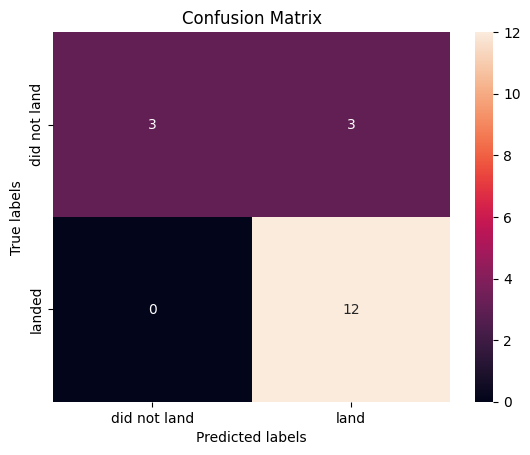

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


In [18]:
# Clean up
del logreg_cv, lr, yhat
gc.collect()

5050

#### SVM

In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [20]:
svm_cv = GridSearchCV(svm, parameters, cv=10, verbose=3).fit(X_train,Y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
[CV 1/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.625 total time=   0.0s
[CV 2/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.625 total time=   0.0s
[CV 3/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 4/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 5/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 6/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 7/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 8/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 9/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 10/10] END C=0.001, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/10] END .C=0.001, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/10] END .C=0.001,

In [21]:
list_acc.append(svm_cv.best_score_)
list_best_params.append(svm_cv.best_params_)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",list_acc[-1])

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
list_score.append(svm_cv.score(X_test, Y_test))
print(f'SVM Score = {list_score[-1]}')

SVM Score = 0.8333333333333334


We can plot the confusion matrix


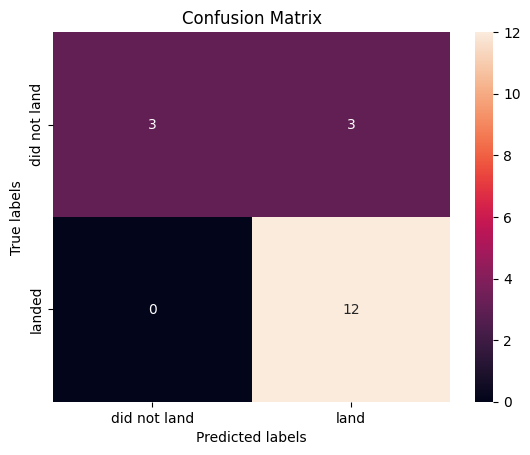

In [23]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [24]:
# Clean up
del svm, svm_cv, yhat
gc.collect()

5121

#### Decision Tree Classifier

In [25]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [26]:
tree_cv = GridSearchCV(tree, parameters, cv=10).fit(X_train,Y_train)

/home/luiz/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/luiz/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/luiz/.local/lib/python3.10/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/luiz/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/luiz/.local/lib

In [27]:
list_acc.append(tree_cv.best_score_)
list_best_params.append(tree_cv.best_params_)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",list_acc[-1])

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.875


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [28]:
list_score.append(tree_cv.score(X_test, Y_test))
print(f'Decision Tree Score = {list_score[-1]}')

Decision Tree Score = 0.5555555555555556


We can plot the confusion matrix


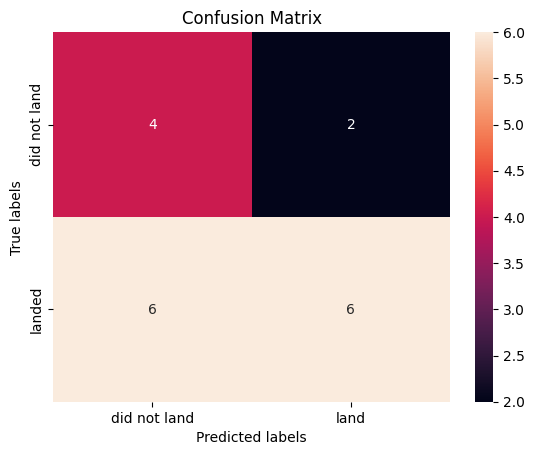

In [29]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [30]:
# Clean up
del tree, tree_cv, yhat
gc.collect()

5347

#### K-Nearest Neighbors

In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [32]:
knn_cv = GridSearchCV(KNN, parameters, cv=10).fit(X_train,Y_train)

In [33]:
list_acc.append(knn_cv.best_score_)
list_best_params.append(knn_cv.best_params_)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",list_acc[-1])

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [34]:
list_score.append(knn_cv.score(X_test, Y_test))
print(f'Decision Tree Score = {list_score[-1]}')

Decision Tree Score = 0.7777777777777778


We can plot the confusion matrix


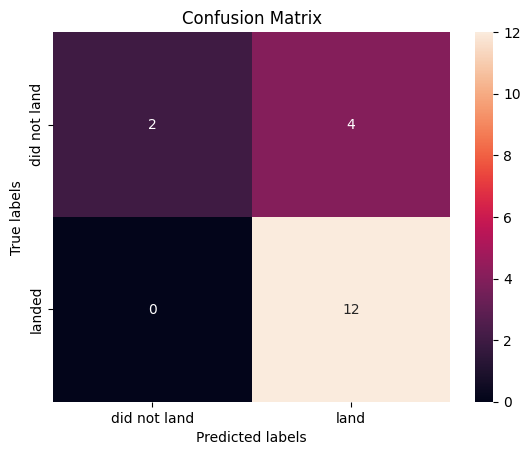

In [35]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [36]:
# Clean up
del knn_cv, KNN, parameters, yhat
gc.collect()

5108

#### Comparing methods metrics:

In [37]:
dict_performance = {'Method':['LogReg', 'SVM', 'Decision Tree', 'KNN'],
                    'Score': list_score,
                    'Accuracy': list_acc
}
pd.options.display.float_format = "{:,.4f}".format
df_performance = pd.DataFrame(dict_performance)
df_performance

,Method,Score,Accuracy
0,LogReg,0.8333,0.8214
1,SVM,0.8333,0.8482
2,Decision Tree,0.5556,0.8750
3,KNN,0.7778,0.8339


Best performance:
Decision Tree.
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}


IBM Corporation 2022. All rights reserved.
